<img src="data/drill_ship.png" style="width:300px; float:left">
<h1 style="text-align: center; color:teal">Data Science and Machine Learning for Planet Earth - Assessment</h1>

<h3 style="text-align: center; color:darkgray">Taken by MSc students on the ACSE, EDSML and GEMS courses</h3>

<h2 style="text-align: center; color:darkred">09:00 – 17:00 BST, Friday 17th of November 2023</h2>

<h2 style="text-align: center; color:red">REMINDER: THIS IS AN INDIVIDUAL ASSESSMENT</h2>

# 🐟 Read the `README.md` file for important information:

We strongly recommend that you read the `README.md` file, and even keep it open on GitHub for referencing during the assessement. It contains more detail on:

- <h3 style="color:teal">Description of the features of your data, and what they mean</h3>
- <h3 style="color:brown">A recommended workflow for this assessment</h3>
- <h3 style="color:teal">A reminder about what constitutes plagiarism</h3>
- <h3 style="color:brown">Details about the assessment criteria</h3>
- <h3 style="color:teal">Submitting your assessment</h3>
- <h3 style="color:brown">Referrencing your sources</h3>

To keep this notebook tidy and small, all of the above are available in the `README.md` file in this repo. 

# 🌊 Predicting Lithologies for the Ocean Drilling Program

In this assessment, you are the **boss of your own AI consluting company**: ***<span style="color:teal">MSC-AI Consulting</span>***. Your client is the **Integrated Ocean Drilling Program** (IODP), a reputable research institution with the mission of drilling the seafloor in order to understand the dynamic of the Earth and its past climates. You know that IODP has approached other, competing AI consulting companies: so don't let them see your answer, and try to do better than them to convince the client to give you the best score!

IODP routinely uses two different types of data:

1. **Cores**: A core is a piece of rock recovered from the seafloor. This allows geologist to perform analysis on the material, and to identify exactly what type of rock is present. Cores are however difficult to recover, and expensive. You can <a href="https://www.ga.gov.au/scientific-topics/marine/survey-techniques/sedimentary-coring-drilling">learn more about cores here if you want</a>.
2. **Downhole (wireline) logs**: IODP can also use downhole or wireline logs, i.e. data from  instruments that are lowered in a drill hole by research geologists. Drill holes can be very deep, down to several kilometers below the water-sediment interface (the unit used is `Depth_WMSF`, also known as meters below seafloor - larger numbers means deeper in the well). Downhole logs record properties of the rocks they measure, including natural gamma radiation (total gamma ray `HCGR`, potassium `HFK`, thorium `HTHO`, uranium `HURA`, shallow and deep penetration resistivity (`IDPH` and `IMPH`) and neutron porosity (`SFLU`). The goal is to use these properties measured continuously to estimate the **lithology** (i.e. type of rock) present. More details are provided <a href="https://en.wikipedia.org/wiki/Well_logging">on this website if you are interested</a>.

IODP has been experimenting recently with a brand new type of downhold log called <code>munsel_color</code>. They reckon that this new log type alongside the others could help in the identification of the lithology from wireline log data. They are very excited to test this, and have contacted you to help them - so you see this type of log for the first time.

## ⛴️ Your task

You are given drilling and logging data (`data/lithology.csv`) that can be used for training and testing, and that contains data from a single well (a drilling location) from 0 to 450 MWSF. In the context of the Integrated Ocean Drilling Program (IODP), the acronym **WMSF** stands for **Water-Depth Meters Below Seafloor**. This unit of measurement is commonly used in ocean drilling and marine geology to specify the depth below the seafloor at which samples are taken or observations are made. 

You are also being given a second file file (`data/new_samples.csv`) that contains logging data **in the same well** but from 450 WMSF down to 700 MWSF (so deeper than your training data). There is no core data in this interval, only logging data. This means that the `lithology` is not known, and **your goal is to use this wireline log data to predict lithology**. 

The following diagrams illustrates this situation:

<img src="data/well.jpg" style="width:600px;">

IODP wants you to train the best algorithm to classify lithology based on the log data provided. The also give you some strict guidance about what they want:

1. 🪸 You can prepare your data any way you want, and select any features you want. But as mentioned previously, IODP is very keen on using their new logging tool called `munsell_color` for your predictions. They stipulate that you need to use this feature in your data pipeline - how you use it is up to you.
<br><br>
2. 🪸 To predict `lithology`, you can use **any parametric model** from sklearn that you prefer. This includes for instance `LogisticRegression`, `SVC(kernel="linear")`, and many others. If you don't know whether your algorithm is parametric, you can try to call the `.coef_` method on it after you `fit` it. If you get an error, it is not parametric and using this model would disqualify you (for instance, `SVC()`, `RandomForest`, `KNeighborsClassifier` are not parametric). You are also told that using `ensemble methods` is not allowed. And you are strongly discouraged from using `MLPClassifier` (too long to train, and too many coefficients - see criteria 2 below).
<br><br>
3. 🪸 You need to put your entire workflow within a `pipeline` object. This pipeline can be of arbitrary complexity, but it needs to ***1.*** be able to take raw data and produce a predictions of labels directly, and ***2.*** the last position of your pipeline should be your parametric estimator (so if IODP does something like `pipeline[-1]` in their automatic testing they will obtain your estimator object).
<br><br>
4. 🪸 IODP will assess the performance of your algorithm in two ways. First, they will use the `F1 macro averaging` score on the label of your **unseen data** (i.e. the data in `data/new_samples.csv`), and subtract the `F1 macro averaging` score of your **test set** (which you can choose as you see fit). The smaller the difference between your test set score and the unseen data score, the better. This implies that they will want to have access to your test and train sets (see **Part C - Writing a class** for details).
<br><br>
5. 🪸 IODP also prefers a balance between high F1 macro score, but simpler models with **as few model coefficients (i.e. model weights) as possible** (as a reminder, the number of weights is exactly proportional to the number of features seen by the classifier). This is why, as a second assessment of your model performance, IODP will look at the ratio of your `F1 macro` score on the predicted **unseen data** divided by the **number of coefficients** in your model (i.e. `model.coef_.shape[1]`), this ratio then multiplied by 100 (higher=better). Hence, you should aim for as few weights as possible (i.e. coefficients) in your model whilst maintaining a decent performance. And as a reminder of point 1. above, you need to include the `munsell_color` feature one way or another in your classifier.
<br><br>
6. 🪸 For fairness, IODP wants you to set `random_state=42` for any algorithm that requires a random state. Failure to do so might result in a lower score.

# Run the cell below first

This will help automatically reload your class when you make changes to it in **Part C**.

In [1]:
%load_ext autoreload
%autoreload 2

# 🐳  PART A: Exploratory Data Analysis (EDA) [30 marks]

In this first task, the client wants you to use this notebook to do some <b>Exploratory Data Analysis</b>. <br>
Make sure to keep the notebook clean, and running from top to bottom. Use markdown cells to explain what you are doing, why, and what your finding and conclusions are. Your goal is the understand your data and how you can best model it.

In [1]:
import matplotlib.pyplot as plt
from numpy import ndarray
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, QuantileTransformer, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction import FeatureHasher
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
plt.style.use('default')
from sklearn.base import BaseEstimator, TransformerMixin
class ZeroTransform(BaseEstimator, TransformerMixin):
    """This transformer replaces negative values by zeros: elemental concentrations cannot be < zero."""
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X = np.where(X < 0, 0, X)
        return X

class LogTransformer(BaseEstimator, TransformerMixin):
    """This class does a simple log-transform of some of the data."""

    def __init__(self, seed = 1e-5):
        self.seed=seed
        return None
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return np.log(X+self.seed)
    
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from table import table

class MunselColorMapper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  # nothing to fit

    def transform(self, X):
        new_cols = X['munsel_color'].apply(lambda x: pd.Series(table[x], index=['munsel_color_1', 'munsel_color_2', 'munsel_color_3']))
        X_mapped = pd.concat([X, new_cols], axis=1)
        X = X_mapped.drop('munsel_color', axis=1)
        return X
    
class DropDuplicatesTransformer(BaseEstimator, TransformerMixin):
    """This transformer drops duplicate rows."""
    
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop_duplicates().copy()

class OutlierRemover(BaseEstimator, TransformerMixin):
    """This transformer removes outliers using an IsolationForest."""
    
    def __init__(self, outlier_detector):
        self.outlier_detector = outlier_detector

    def fit(self, X, y=None):
        self.outlier_detector.fit(X)
        return self

    def transform(self, X, y=None):
        is_inlier = self.outlier_detector.predict(X) > 0 # 1 for inliers, -1 for outliers
        return X[is_inlier]

In [11]:
import pandas as pd
# Load the data:

df = pd.read_csv('data/log_data.csv') # This is your EDA (Part A) and training data (Parts B and C)

new_samples = pd.read_csv('data/new_data.csv') # This is the file you need to predict in parts B and C

## Data Clean
Clean data and remove duplicate values

In [12]:
df.duplicated().sum()

551

In [13]:
# remove duplicates
df = df.drop_duplicates()

In [14]:
df.duplicated().sum()

0

In [15]:
df.head()

,DEPTH_WMSF,HCGR,HFK,HTHO,HURA,IDPH,IMPH,SFLU,munsel_color,lithology
0,0.0724,5.8481,0.0959,1.3131,-0.1712,1950.0000,1765.0116,0.0915,5R 4 10,Sandy Mud
1,0.0736,0.5881,0.0116,0.1206,0.0077,46.6488,124.4472,1.5966,10PB 0.2 18,Sandy Mud
2,0.0880,1.9945,0.0354,0.4317,0.0501,1950.0000,1950.0000,0.1589,2.5YR 8 10,Interbedded sand and mud
3,0.0920,22.4306,0.6522,3.3707,0.0916,1950.0000,1950.0000,9700.0000,10PB 0.2 18,Sandy Mud
4,0.2248,7.6691,0.1369,1.6566,-0.2301,1950.0000,1765.0116,0.0915,10PB 0.2 18,Sandy Mud


In [16]:
# check for missing values
df.isnull().sum() # no missing values

DEPTH_WMSF      0
HCGR            0
HFK             0
HTHO            0
HURA            0
IDPH            0
IMPH            0
SFLU            0
munsel_color    0
lithology       0
dtype: int64

## Train-Test split

In [23]:
def get_X_y(df):
    X = df.drop(['lithology'], axis=1)
    y = df['lithology']
    return X, y

In [24]:
from sklearn.preprocessing import LabelEncoder
# 创建一个 LabelEncoder 实例
le = LabelEncoder()
y = df['lithology']
le.fit(y)
y = le.transform(y) # y is now a numpy array of integers
df['lithology'] = y

In [25]:
test_frac = int(df.shape[0]*.3)+1
sorted_data = df.sort_values(by=['DEPTH_WMSF'], ascending=False)        
test_set = sorted_data.iloc[:test_frac]
train_set = sorted_data.iloc[test_frac:]

X_train, y_train = get_X_y(train_set)
X_test, y_test = get_X_y(test_set)

In [26]:
X_train.head()

,DEPTH_WMSF,HCGR,HFK,HTHO,HURA,IDPH,IMPH,SFLU,munsel_color
8139,273.9120,53.0798,1.5359,8.0245,2.2557,1.2995,1.0868,0.6589,5P 3 6
8138,273.7984,59.1977,1.5576,9.8627,2.7544,1.5905,1.3903,0.6885,2.5R 8 6
8137,273.7840,56.5277,1.4407,9.6910,2.1578,1.2697,1.2614,1.1236,10B 8 12
8136,273.7828,22.3937,0.4726,4.4135,1.1880,1.0736,1.1140,0.6077,5P 3 6
8135,273.7596,51.6912,1.5067,7.7503,2.4325,1.3005,1.1050,0.6512,5P 3 6


In [27]:
y_train

8139    2
8138    3
8137    3
8136    2
8135    2
       ..
4       4
3       4
2       1
1       4
0       4
Name: lithology, Length: 7755, dtype: int64

In [28]:
y_train.shape

(7755,)

In [29]:
X_train.dtypes

DEPTH_WMSF      float64
HCGR            float64
HFK             float64
HTHO            float64
HURA            float64
IDPH            float64
IMPH            float64
SFLU            float64
munsel_color     object
dtype: object

In [30]:
num_features = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_features = X_train.select_dtypes(include=['object']).columns

In [32]:
num_features # get numerical features

Index(['DEPTH_WMSF', 'HCGR', 'HFK', 'HTHO', 'HURA', 'IDPH', 'IMPH', 'SFLU'], dtype='object')

In [33]:
X_train_num = X_train[num_features] # get data of numerical features

In [34]:
X_train_num

,DEPTH_WMSF,HCGR,HFK,HTHO,HURA,IDPH,IMPH,SFLU
8139,273.9120,53.0798,1.5359,8.0245,2.2557,1.2995,1.0868,0.6589
8138,273.7984,59.1977,1.5576,9.8627,2.7544,1.5905,1.3903,0.6885
8137,273.7840,56.5277,1.4407,9.6910,2.1578,1.2697,1.2614,1.1236
8136,273.7828,22.3937,0.4726,4.4135,1.1880,1.0736,1.1140,0.6077
8135,273.7596,51.6912,1.5067,7.7503,2.4325,1.3005,1.1050,0.6512
...,...,...,...,...,...,...,...,...
4,0.2248,7.6691,0.1369,1.6566,-0.2301,1950.0000,1765.0116,0.0915
3,0.0920,22.4306,0.6522,3.3707,0.0916,1950.0000,1950.0000,9700.0000
2,0.0880,1.9945,0.0354,0.4317,0.0501,1950.0000,1950.0000,0.1589
1,0.0736,0.5881,0.0116,0.1206,0.0077,46.6488,124.4472,1.5966


## Correlation analysis
Several groups of strongly correlated features were discovered through heatmap
- HCGR, HFK, HTHO
- IDPH, SFLU

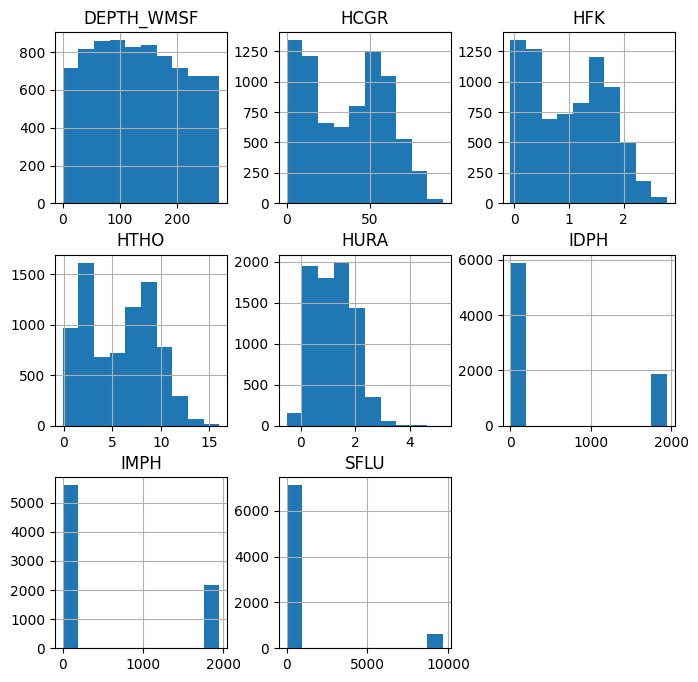

In [78]:
X_train[num_features].hist(figsize=(8,8));

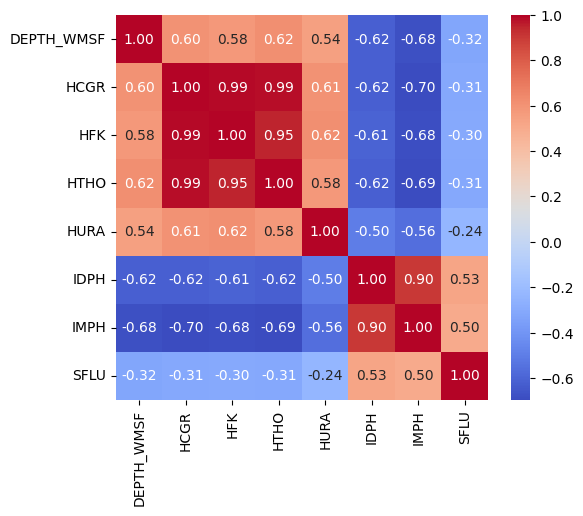

In [36]:
# heatmap
corr = X_train_num.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [40]:
# drop highly correlated features
X_train_num_dropped = X_train_num.drop(['DEPTH_WMSF', 'HFK', 'HTHO', 'IDPH'], axis=1)

DEPTH_WMSF should be removed since depth is a metric for splitting a dataset.

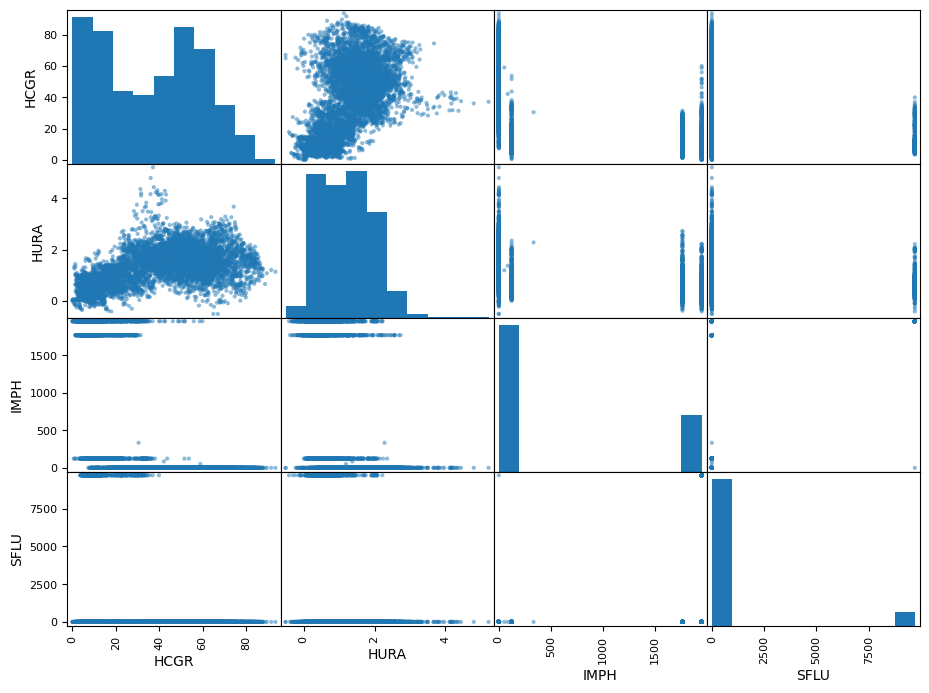

In [41]:
pd.plotting.scatter_matrix(X_train_num_dropped, figsize=(11,8));

/home/kagami/anaconda3/envs/dsml4p/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


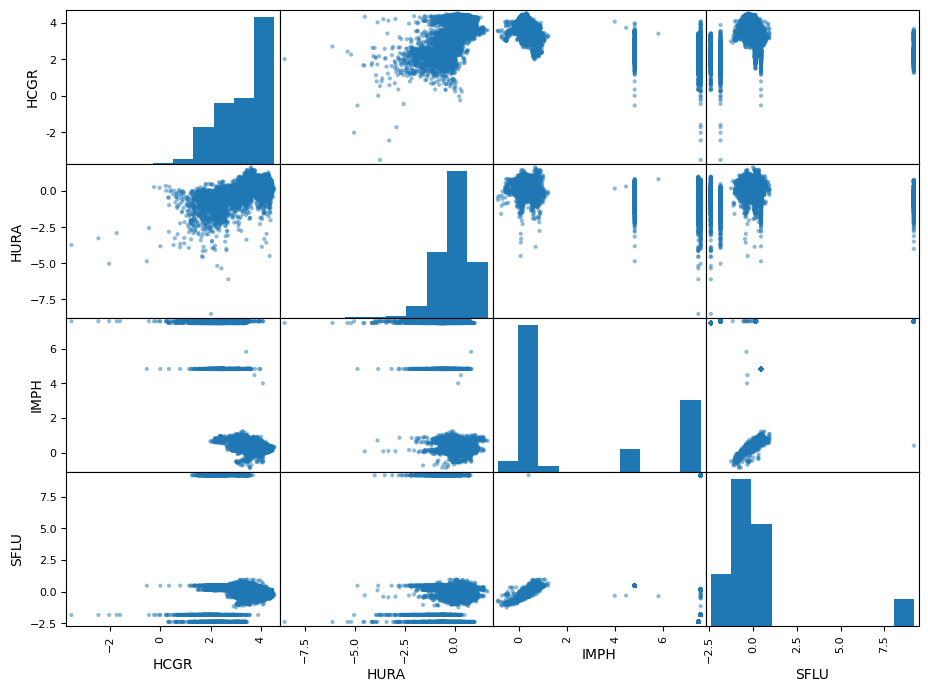

In [42]:
# log transform
pd.plotting.scatter_matrix(np.log(X_train_num_dropped), figsize=(11,8));

## Non-zero transform
Some physical quantities theoretically do not have negative numbers.

In [43]:
X_train_num_dropped

,HCGR,HURA,IMPH,SFLU
8139,53.0798,2.2557,1.0868,0.6589
8138,59.1977,2.7544,1.3903,0.6885
8137,56.5277,2.1578,1.2614,1.1236
8136,22.3937,1.1880,1.1140,0.6077
8135,51.6912,2.4325,1.1050,0.6512
...,...,...,...,...
4,7.6691,-0.2301,1765.0116,0.0915
3,22.4306,0.0916,1950.0000,9700.0000
2,1.9945,0.0501,1950.0000,0.1589
1,0.5881,0.0077,124.4472,1.5966


In [44]:
X_train_num_dropped.columns

Index(['HCGR', 'HURA', 'IMPH', 'SFLU'], dtype='object')

In [45]:
# non-zero transform
clf_zero = ZeroTransform()
X_train_num_nonzero = pd.DataFrame(clf_zero.fit_transform(X_train_num_dropped), columns=X_train_num_dropped.columns)

In [46]:
X_train_num_nonzero

,HCGR,HURA,IMPH,SFLU
0,53.0798,2.2557,1.0868,0.6589
1,59.1977,2.7544,1.3903,0.6885
2,56.5277,2.1578,1.2614,1.1236
3,22.3937,1.1880,1.1140,0.6077
4,51.6912,2.4325,1.1050,0.6512
...,...,...,...,...
7750,7.6691,0.0000,1765.0116,0.0915
7751,22.4306,0.0916,1950.0000,9700.0000
7752,1.9945,0.0501,1950.0000,0.1589
7753,0.5881,0.0077,124.4472,1.5966


## Log Transform
Through observation, some variables have better distribution after log change.


In [47]:
to_log = ['IMPH', 'SFLU']
clf_log = LogTransformer(seed=1e-5)
X_train_num_logged = X_train_num_nonzero.copy()
X_train_num_logged[to_log] = clf_log.transform(X_train_num_nonzero[to_log])

In [48]:
X_train_num_nonzero.head()

,HCGR,HURA,IMPH,SFLU
0,53.0798,2.2557,1.0868,0.6589
1,59.1977,2.7544,1.3903,0.6885
2,56.5277,2.1578,1.2614,1.1236
3,22.3937,1.1880,1.1140,0.6077
4,51.6912,2.4325,1.1050,0.6512


In [49]:
X_train_num_logged.head()

,HCGR,HURA,IMPH,SFLU
0,53.0798,2.2557,0.083247,-0.417168
1,59.1977,2.7544,0.329527,-0.373225
2,56.5277,2.1578,0.232230,0.116547
3,22.3937,1.1880,0.107966,-0.498057
4,51.6912,2.4325,0.099854,-0.428923


## Outliers detection

Through boxplot, it was found that there were no obvious outliers. 

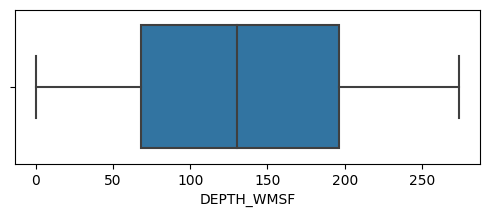

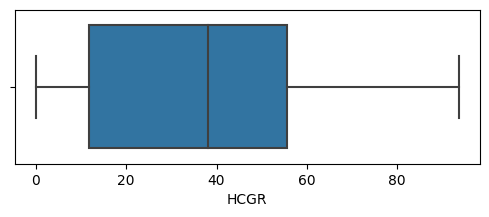

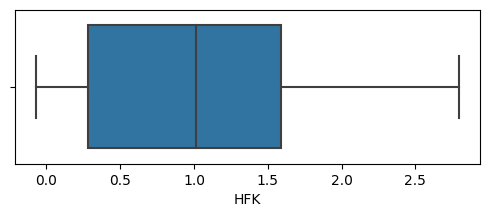

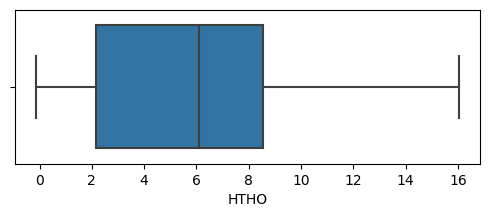

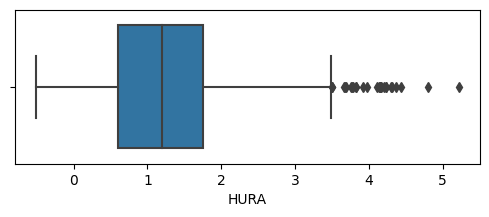

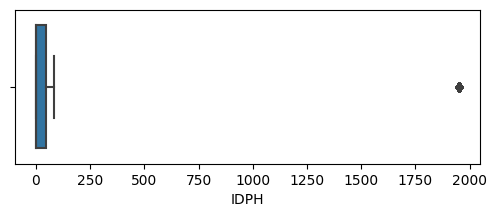

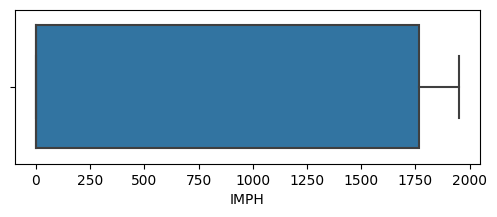

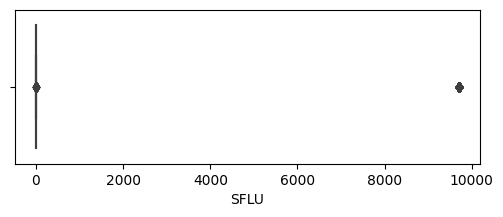

In [54]:
# Find outliers in numerical features
for col in X_train_num:
    plt.figure(figsize=(6, 2))  
    sns.boxplot(x=X_train[col])

IDPH, SFLU

In [55]:
X_train_num['IDPH']

8139       1.2995
8138       1.5905
8137       1.2697
8136       1.0736
8135       1.3005
          ...    
4       1950.0000
3       1950.0000
2       1950.0000
1         46.6488
0       1950.0000
Name: IDPH, Length: 7755, dtype: float64

In [96]:
X_train_num['SFLU']

0          0.0915
1          1.5966
2          0.1589
3       9700.0000
4          0.0915
          ...    
8136       0.6077
8137       1.1236
8138       0.6885
8139       0.6589
8140       0.6285
Name: SFLU, Length: 7756, dtype: float64

In [56]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination=0.01)

clf.fit(X_train_num)

outlier_pred = clf.predict(X_train_num)

/home/kagami/anaconda3/envs/dsml4p/lib/python3.11/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [57]:
outlier_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
X_train_no_outliers = X_train[num_features][outlier_pred == 1]

In [84]:
X_train_num_logged

,HCGR,HURA,IMPH,SFLU
0,5.8481,0.0000,7.475913,-2.391307
1,0.5881,0.0077,4.823882,0.467883
2,1.9945,0.0501,7.575585,-1.839417
3,22.4306,0.0916,7.575585,9.179881
4,7.6691,0.0000,7.475913,-2.391307
...,...,...,...,...
7751,22.3937,1.1880,0.107966,-0.498057
7752,56.5277,2.1578,0.232230,0.116547
7753,59.1977,2.7544,0.329527,-0.373225
7754,53.0798,2.2557,0.083247,-0.417168


## Category Data Analysis

In [79]:
import sys
sys.path.append("dsml4pe-2023-assessment-acse-wy1223/table.py")
from table import table

In [65]:
table['10B 0.2 2']

[0.133, 0.149, 0.237]

In [66]:
X_train

,DEPTH_WMSF,HCGR,HFK,HTHO,HURA,IDPH,IMPH,SFLU,munsel_color
8139,273.9120,53.0798,1.5359,8.0245,2.2557,1.2995,1.0868,0.6589,5P 3 6
8138,273.7984,59.1977,1.5576,9.8627,2.7544,1.5905,1.3903,0.6885,2.5R 8 6
8137,273.7840,56.5277,1.4407,9.6910,2.1578,1.2697,1.2614,1.1236,10B 8 12
8136,273.7828,22.3937,0.4726,4.4135,1.1880,1.0736,1.1140,0.6077,5P 3 6
8135,273.7596,51.6912,1.5067,7.7503,2.4325,1.3005,1.1050,0.6512,5P 3 6
...,...,...,...,...,...,...,...,...,...
4,0.2248,7.6691,0.1369,1.6566,-0.2301,1950.0000,1765.0116,0.0915,10PB 0.2 18
3,0.0920,22.4306,0.6522,3.3707,0.0916,1950.0000,1950.0000,9700.0000,10PB 0.2 18
2,0.0880,1.9945,0.0354,0.4317,0.0501,1950.0000,1950.0000,0.1589,2.5YR 8 10
1,0.0736,0.5881,0.0116,0.1206,0.0077,46.6488,124.4472,1.5966,10PB 0.2 18


In [67]:
cat_features

Index(['munsel_color'], dtype='object')

In [68]:
X_train_cat = X_train[cat_features]

In [69]:
X_train_cat

,munsel_color
8139,5P 3 6
8138,2.5R 8 6
8137,10B 8 12
8136,5P 3 6
8135,5P 3 6
...,...
4,10PB 0.2 18
3,10PB 0.2 18
2,2.5YR 8 10
1,10PB 0.2 18


In [88]:
import pandas as pd
from table import table
def munsel_color_map(X_train_cat):
    new_cols = X_train_cat['munsel_color'].apply(lambda x: pd.Series(table[x], index=['munsel_color_1', 'munsel_color_2', 'munsel_color_3']))

    X_train_cat_mapped = pd.concat([X_train_cat, new_cols], axis=1)

    return X_train_cat_mapped.drop('munsel_color', axis=1)

In [89]:
clf_color = MunselColorMapper()
X_train_cat_mapped = clf_color.fit_transform(X_train_cat)

In [90]:
X_train_cat_mapped

,munsel_color_1,munsel_color_2,munsel_color_3
8139,0.2870,0.2135,6.550
8138,0.3671,0.3175,59.100
8137,0.1900,0.2240,59.100
8136,0.2870,0.2135,6.550
8135,0.2870,0.2135,6.550
...,...,...,...
4,0.1930,0.0120,0.237
3,0.1930,0.0120,0.237
2,0.4552,0.3761,59.100
1,0.1930,0.0120,0.237


In [91]:
X_train_num_logged

,HCGR,HURA,IMPH,SFLU
0,53.0798,2.2557,0.083247,-0.417168
1,59.1977,2.7544,0.329527,-0.373225
2,56.5277,2.1578,0.232230,0.116547
3,22.3937,1.1880,0.107966,-0.498057
4,51.6912,2.4325,0.099854,-0.428923
...,...,...,...,...
7750,7.6691,0.0000,7.475913,-2.391307
7751,22.4306,0.0916,7.575585,9.179881
7752,1.9945,0.0501,7.575585,-1.839417
7753,0.5881,0.0077,4.823882,0.467883


In [92]:
X_train_cat_mapped= X_train_cat_mapped.reset_index(drop=True)

In [93]:
X_train_all = pd.concat([X_train_num_logged, X_train_cat_mapped], axis=1)

In [94]:
X_train_all 

,HCGR,HURA,IMPH,SFLU,munsel_color_1,munsel_color_2,munsel_color_3
0,53.0798,2.2557,0.083247,-0.417168,0.2870,0.2135,6.550
1,59.1977,2.7544,0.329527,-0.373225,0.3671,0.3175,59.100
2,56.5277,2.1578,0.232230,0.116547,0.1900,0.2240,59.100
3,22.3937,1.1880,0.107966,-0.498057,0.2870,0.2135,6.550
4,51.6912,2.4325,0.099854,-0.428923,0.2870,0.2135,6.550
...,...,...,...,...,...,...,...
7750,7.6691,0.0000,7.475913,-2.391307,0.1930,0.0120,0.237
7751,22.4306,0.0916,7.575585,9.179881,0.1930,0.0120,0.237
7752,1.9945,0.0501,7.575585,-1.839417,0.4552,0.3761,59.100
7753,0.5881,0.0077,4.823882,0.467883,0.1930,0.0120,0.237


## Scale
After concatenating num and cat, scale all. After some testing, the StandardScaler is the best.

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_all_std = pd.DataFrame(scaler.fit_transform(X_train_all), columns=X_train_all.columns)

In [99]:
X_train_all_std

,HCGR,HURA,IMPH,SFLU,munsel_color_1,munsel_color_2,munsel_color_3
0,0.720963,1.438880,-0.781299,-0.264480,0.201999,-0.456031,-0.714166
1,0.985821,2.133226,-0.706681,-0.248615,0.625498,0.040502,1.220815
2,0.870231,1.302573,-0.736160,-0.071794,-0.310852,-0.405900,1.220815
3,-0.607511,-0.047691,-0.773809,-0.293683,0.201999,-0.456031,-0.714166
4,0.660847,1.685041,-0.776267,-0.268723,0.201999,-0.456031,-0.714166
...,...,...,...,...,...,...,...
7750,-1.244973,-1.701758,1.458538,-0.977197,-0.294990,-1.418063,-0.946621
7751,-0.605913,-1.574222,1.488736,3.200316,-0.294990,-1.418063,-0.946621
7752,-1.490640,-1.632003,1.488736,-0.777950,1.091294,0.320279,1.220815
7753,-1.551527,-1.691037,0.655023,0.055048,-0.294990,-1.418063,-0.946621


## Build pipeline

In [100]:
num_features = ['HCGR','HURA']
num_log_features = ['IMPH', 'SFLU']
cat_features = ['munsel_color']

num_pipe = make_pipeline(SimpleImputer(), ZeroTransform(), StandardScaler()) 
num_log_pipe = make_pipeline(SimpleImputer(), ZeroTransform(), LogTransformer(), StandardScaler())
cat_pipe = make_pipeline(MunselColorMapper(), StandardScaler())

full_pipe = ColumnTransformer([
    ('num_pipe', num_pipe, num_features),
    ('num_log_pipe', num_log_pipe, num_log_features),                           
    ('cat_pipe', cat_pipe, cat_features)])

In [101]:
def get_X_y(df):
    X = df.drop(['lithology'], axis=1)
    y = df['lithology']
    return X, y

In [102]:
X_train, y_train = get_X_y(train_set)
X_test, y_test = get_X_y(test_set)

In [12]:
test_frac = int(df.shape[0]*.3)+1
test_frac
sorted_data = df.sort_values(by=['DEPTH_WMSF'], ascending=False)
sorted_data.head()
test_set = sorted_data.iloc[:test_frac]
train_set = sorted_data.iloc[test_frac:]

In [13]:
train_set['lithology'].value_counts()

3    3385
0    1846
2     970
1     929
4     625
Name: lithology, dtype: int64

In [14]:
test_set['lithology'].value_counts()

3    1548
2    1033
4     744
Name: lithology, dtype: int64

In [31]:
X_train, y_train = get_X_y(train_set)
X_test, y_test = get_X_y(train_set)

In [32]:
X_train_processed = full_pipe.fit_transform(X_train)
X_test_processed = full_pipe.transform(X_test)

# 🐠 PART B: Finding the best model [30 marks]

Once you understand your data, you can start to find the best model. Remember that IODP has a few criteria for you:
1. You must at least use the `munsell_color` feature in your model
2. You must write the entire model as a `pipeline` that can process raw data and return a prediction. Your estimator must be a `parametric model`, i.e. `model.coef_` must return the coefficients of the model.
3. Your model will be evaluated against performance on the unseen data. This will include checking how close your predicted `F1 macro` of your test set is to the `F1 macro` calculated by your model on the unseen data (IODP has secret labels for that).
4. Your model will also be evaluated for simplicity versus performance, i.e. the ratio of `F1 macro` on the unseen data against the `number of coefficients` (not their values) of your model.

Once you have defined and trained your best model, please run the cell below the next empty cell. This cell assumes that 1. your trained best model is called `best_model`, your `X_test` and your `y_test_cat` are named exactly like this (and `y_train_cat` represents the `y_test` transformed into categorical value. Running this cell will save values that will be used for automatic testing of your results, so this is important. If your variables have different names, you can change this code.

In [122]:
import pandas as pd
# Load the data:
df = pd.read_csv('data/log_data.csv') # This is your EDA (Part A) and training data (Parts B and C)

new_samples = pd.read_csv('data/new_data.csv') # This is the file you need to predict in parts B and C

In [123]:
# label encoding
y = df['lithology']
le = LabelEncoder()
le.fit(y)
y = le.transform(y)
df['lithology'] = y

In [126]:
# Create as many cells as you need - keep your notebook clean
test_frac = int(df.shape[0]*.3)+1
test_frac
sorted_data = df.sort_values(by=['DEPTH_WMSF'], ascending=False)
sorted_data.head()
test_set= sorted_data.iloc[:test_frac]
train_set= sorted_data.iloc[test_frac:]
X_train, y_train = get_X_y(train_set)
X_test, y_test = get_X_y(train_set)

In [127]:
X_train_processed = full_pipe.fit_transform(X_train)
X_test_processed = full_pipe.transform(X_test)

## Logisticregression

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

model_logit = LogisticRegression(max_iter=5000)
model_logit.fit(X_train_processed, y_train)

y_pred = model_logit.predict(X_test_processed)

precision_logit = precision_score(y_test, y_pred, average=None)
recall_logit = recall_score(y_test, y_pred, average=None)
accuracy_logit = accuracy_score(y_test, y_pred)
f1_logit = f1_score(y_test, y_pred, average=None)
f1_logit.mean()

0.8687707013273371

## SVC 

In [135]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

model_svc = SVC(kernel="linear")
model_svc.fit(X_train_processed, y_train)
y_pred = model_svc.predict(X_test_processed)
f1_svc = f1_score(y_test, y_pred, average=None)
print(f1_svc.mean())

0.8742641178376613


In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear']
}
svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=5)

grid_search.fit(X_train_processed, y_train)
print(grid_search.best_params_)

{'C': 100, 'gamma': 1, 'kernel': 'linear'}


In [151]:
model_svc_best = SVC(kernel="linear", C=100, gamma=1)
model_svc_best.fit(X_train_processed, y_train)
y_pred = model_svc_best.predict(X_test_processed)
f1_svc = f1_score(y_test, y_pred, average=None)
print(f1_svc.mean())

0.8742644371757018


In [144]:
# RUN THIS CELL TO SAVE YOUR SCORES TO DISC - ESSENTIAL FOR AUTOMATIC TESTING
best_model = model_svc_best
y_test_cat = y_test
X_test = X_test_processed
from sklearn.metrics import f1_score

pd.Series(f1_score(y_test_cat, best_model.predict(X_test), average='macro'), name='f1_test').to_csv('f1_test.csv', index=False)
pd.Series(best_model.predict(X_test), name='y_pred').to_csv('y_pred_notebook.csv', index=False)

# 🦈 PART C: Write the `LithoEstimator` Class [40 marks]

This is the final piece of the assignment. If you open the `litho_estimator.py` file you will see that the skeleton of a class called `LithoEstimator` has been created for you. Your job is to finish the class in the file, based on what you found out in **parts A and B**. I expect this class to have the following behaviour:

1. When a new instance of the class is created, it will automatically create a machine learning model (a pipeline with an estimator) that is defined in the same way as your most performant algorithm. That is to say, use the same parameters (and hyperparameters) than you best estimator, but do not do any EDA or hyperparameter tuning (this would be done in **parts A and B** in this notebook).
2. At initialisation time, you need to create the variables `self.X_train`, `self.X_test`, `self.y_train` and `self.y_test`.
3. The class will automatically train your algorithm on the `X_train` and `y_train`
4. The `x_test_score(self)` method should return the `f1_score` with `average=macro` of your predicted `X_test`.
5. The `get_Xs(self)` method should return `X_train` and `X_test`
6. The `get_ys(self)` method should return `y_train` and `y_test`
7. The `predict(self, path_to_new_file)` method should return the `y_pred` (predictions) for any file path we give to the method. The default value for `path_to_new_file` is already set for you as the `new_data.csv` file.
8. The `get_model(self)` method should return the entire **trained model** (pipeline) that includes the final predictor. I recommend you save your model as an instance variable (`self.model`).
9. You can add as many other methods as needed, or write additional classes such as custom transformers or others in the same python file.

If you want a rough test of your code, you can try to run the cells below:

In [5]:
from litho_estimator import LithoEstimator
model = LithoEstimator(path='data/log_data.csv')

/mnt/d/Documents/Github/dsml4pe-2023-assessment-acse-wy1223/litho_estimator.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data_preprocessed['lithology'] = y


In [6]:
model.create_model()

In [7]:
model.get_model()

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('zerotransform',
                                                                   ZeroTransform()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['HCGR', 'HURA']),
                                                 ('num_log_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('zerotransform',
                                                                   ZeroTransform()),
                                                                  ('logtransformer',
                                                                   LogTransformer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['IMPH', 'SFLU']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('munselcolormapper',
                                                                   MunselColorMapper()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['munsel_color'])])),
                ('svc', SVC(C=100, gamma=1, kernel='linear'))])

In [8]:
model.predict(path_to_new_file='data/new_data.csv')

array(['Marl', 'Mud', 'Marl', ..., 'Sandy Mud', 'Marl', 'Sandy Mud'],
      dtype=object)

In [9]:
model.get_ys() # Should return your  y_train and y_test

(8139    2
 8138    3
 8137    3
 8136    2
 8135    2
        ..
 4       4
 3       4
 2       1
 1       4
 0       4
 Name: lithology, Length: 7755, dtype: int64,
 8139    2
 8138    3
 8137    3
 8136    2
 8135    2
        ..
 4       4
 3       4
 2       1
 1       4
 0       4
 Name: lithology, Length: 7755, dtype: int64)

In [10]:
model.x_test_score() # Should return your test F1 score macro

0.8760890113339297

In [11]:
model.predict() # Should return an array or a Series of your predictions for the new samples

array(['Marl', 'Mud', 'Marl', ..., 'Sandy Mud', 'Marl', 'Sandy Mud'],
      dtype=object)

In [12]:
model.get_model() # Should return your trained pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('zerotransform',
                                                                   ZeroTransform()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['HCGR', 'HURA']),
                                                 ('num_log_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('zerotransform',
                                                                   ZeroTransform()),
                                                                  ('logtransformer',
                                                                   LogTransformer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['IMPH', 'SFLU']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('munselcolormapper',
                                                                   MunselColorMapper()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['munsel_color'])])),
                ('svc', SVC(C=100, gamma=1, kernel='linear'))])

### ☄️ GOOD LUCK!

# 🏁 Finished!

Well done! <span style="color:teal">**Push your exercise to GitHub**</span>, and move on to the next one.